R-squared: 0.9755
공부시간 3.8시간에 대한 예측 성적 : 50.7


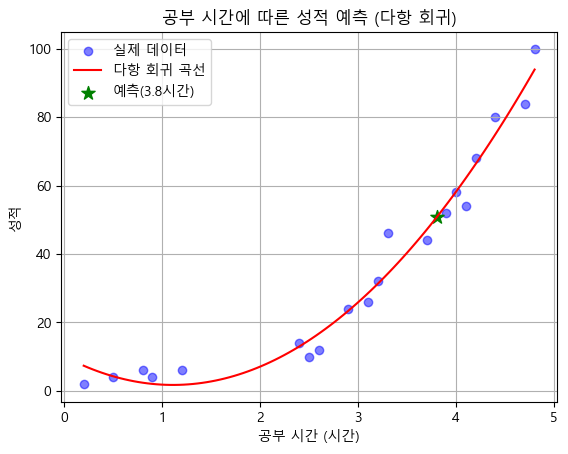

In [ ]:
#다항회귀부터
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  # 여러 단계를 순서대로 처리 및 연결(ex. 다항 특성변환과 선형회귀 순서대로 적용)

#폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

#마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

#숫자가 지수표현으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format




#1. CSV 파일 읽기
dataset = pd.read_csv('./dataset/PolynomialRegressionData.csv')

#2. 데이터 준비              "열 개수 1고정 행은 자동계산"
X = dataset['hour'].values.reshape(-1, 1)
y = dataset['score'].values

#3. 다항 회귀 모델 생성 (학습)
degree = 2             # 다항회귀, 데이터 변형 도구     #선형, 실제 모델
polyleg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
          #pipeline 생성(여러개 집어넣음)
polyleg.fit(X, y)

#4. 모델 성능 평가(R-squared)
r_squared = polyleg.score(X, y)
print(f"R-squared: {r_squared:.4f}")

#5. 새로운 데이터로 예측 (공부 3.8시간) #array, predict
new_hours = np.array([[3.8]])
predicted_score = polyleg.predict(new_hours)
print(f"공부시간 3.8시간에 대한 예측 성적 : {predicted_score[0]:.1f}")

#6. 시각화
#데이터 포인트 산점도
plt.scatter(X, y, color='blue', alpha=0.5, label='실제 데이터')
#곡선그리기
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred = polyleg.predict(X_range)
plt.plot(X_range, y_pred, color='red', label='다항 회귀 곡선')

#예측 데이터 포인트 표시
plt.scatter(new_hours, predicted_score, color='green', s=100, marker='*', label='예측(3.8시간)')

#그래프 설정
plt.xlabel('공부 시간 (시간)')
plt.ylabel('성적')
plt.title('공부 시간에 따른 성적 예측 (다항 회귀)')
plt.legend()
plt.grid(True)

#그래프 표시
plt.show()

-- Epoch 1
Norm: 0.04, NNZs: 4, Bias: 0.004003, T: 120, Avg. loss: 0.660526
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4, Bias: 0.006118, T: 240, Avg. loss: 0.483315
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 4, Bias: 0.007592, T: 360, Avg. loss: 0.389241
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.08, NNZs: 4, Bias: 0.008693, T: 480, Avg. loss: 0.330094
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 4, Bias: 0.009543, T: 600, Avg. loss: 0.290216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 4, Bias: 0.010201, T: 720, Avg. loss: 0.262245
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.10, NNZs: 4, Bias: 0.010712, T: 840, Avg. loss: 0.242068
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.11, NNZs: 4, Bias: 0.011118, T: 960, Avg. loss: 0.227124
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.11, NNZs: 4, Bias: 0.011434, T: 1080, Avg. loss: 0.215801
Total training time: 0.00 seconds.


ValueError: x and y must be the same size

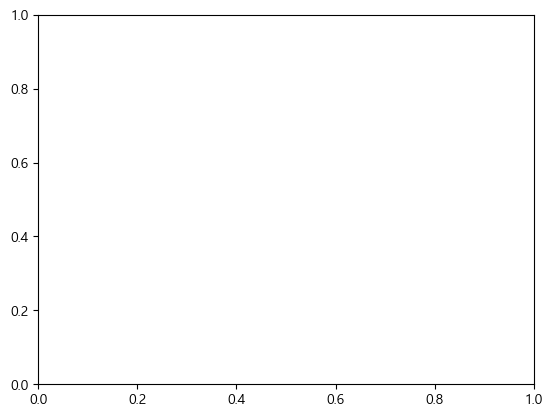

In [ ]:
from sklearn.linear_model import SGDRegressor
                  # 반복률       # 학습률                    #보여줄지 말지
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

sr.coef_, sr.intercept_
sr.score(X_test, y_test) 
sr.score(X_train, y_train)

plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
#"로지스틱" 회귀 전에(shape 변경 예제)

import numpy as np 
#"2차원" 배열 생성
p = np.array([[1, 2, 3], [4, 5, 6]])
print("original", p)
print("shape:", p.shape)

#-1 적용 #열을 무시해!
p = p.reshape(-1)
print("original", p)
print("shape:", p.shape)

original [[1 2 3]
 [4 5 6]]
shape: (2, 3)
original [1 2 3 4 5 6]
shape: (6,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#읽기
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

#X , Y 구분
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#학습
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#예측
classifier.predict([[6]])
classifier.predict_proba([[6]])

y_pred = classifier.predict(X_test)

#정확도 반환
classifier.score(X_test, y_test)


0.75

In [108]:
#KNN (K Nearest Neighbors)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # 분류에서의 R score
from sklearn.datasets import load_iris
#데이터 가져오기
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names






#데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

pd = knn.predict(X_train)

ac = accuracy_score(y_test, pd)

#새로운 데이터 예측 (선택)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
newpd = knn.predict(new_data)
print(f"New data prediction: {iris.target_names[newpd[0]]}") # 예측 결과 출력


ValueError: Found input variables with inconsistent numbers of samples: [45, 105]

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iris =load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_names'] = [target_names[i] for i in y]

print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth(나무의 최대깊이) 조절 : 하이퍼튜닝

NameError: name 'x' is not defined

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV # 중요
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Confusion matrix 시각화를 위해 추가

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_names'] = [target_names[i] for i in y]
print(df.head())

# 데이터 분할 (훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 랜덤 포레스트는 모델을 생성해야함
# 하이퍼 파라미터 튜닝 : GridSearchCV
param_grid = {
    
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
    
}

#
rf_model = RandomForestClassifier(random_state=42)
# 교차 검증 cv =3 : 훈련 데이터를 3개의 FOLD(묶음)으로 나누어서 두개를 훈련, 나머지는 검증 용도로 활용
# 교차 검증은 최적의 하이퍼 파라미터 값을 찾기 위해서 사용됨
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy')
# 모델 학습 (GridSearchCV를 통한 최적의 파라미터를 반영한 학습)
grid_search.fit(X_train, y_train)


#최고의 파라미터 출력
print("Best : " , grid_search.best_params_)

#최적의 모델
best_model = grid_search.best_estimator_

#예측
treepr = best_model.predict(X_test)

#평가
treeac = accuracy_score(y_test, y_pred)

#보고서
print(classification_report(y_test, y_pred, target_names=target_names))

#혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0               5.10              3.50               1.40              0.20   
1               4.90              3.00               1.40              0.20   
2               4.70              3.20               1.30              0.20   
3               4.60              3.10               1.50              0.20   
4               5.00              3.60               1.40              0.20   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


KeyboardInterrupt: 

In [ ]:
#나이브 베이즈
#스팸 분류

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # 텍스트 데이터를 "숫자"로 변환 (TF-IDF 벡터화)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 데이터 읽기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')

# 데이터 내용 미리보기
print(data.head())

data = data[['v1', 'v2']]
data.columns = ['label', 'text']

#2 데이터 전처리
label = data['label'].map({'ham': 0, 'spam': 1})
data.dropna(inplace=True)

#3 학습 및 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], label, test_size=0.2, random_state=42) 

#4. "벡터화"
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#5. 모델 학습 (나이브 베이즈)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

#6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7. 샘플 테스트
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
               "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
               "Hey, are we meeting for lunch tomorrow?"]

sample_test = vectorizer.transform(sample_text)
pr = model.predict(sample_test)
for text, label in zip(sample_text, pr):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 데이터 읽기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')

# 데이터 내용 미리보기
print(data.head())

data = data[['v1', 'v2']]
data.columns = ['label', 'text']

#2 데이터 전처리                # ham을 0으로 spam을 1로 매핑
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data.dropna(inplace=True)

# 3. 학습 및 테스트 데이터 분리
# X 변수. 특징 Y 실제값. 종속
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

#4. "벡터화"  "문서빈도수 예측 (a ,the 등 제외)" (영어 제외)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#5. !SVM모델 학습
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_tfidf, y_train)

#6. 예측 및 평가
y_pred = model.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7. 샘플 테스트
sample_text = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 now!",
    "Congratulations! You've been selected to receive a free iPhone 15. Click to claim now!",
    "Hey, are we meeting for lunch tomorrow?"
]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Text: Free entry in 2 a wkly comp to win FA Cup final tkts 2

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         0.64     0.85           0.15           0.91    -0.69  0.20   
1        -0.84    -1.12          -0.16           0.53    -0.69 -0.68   
2         1.23     1.94          -0.26          -1.29    -0.69 -1.10   
3        -0.84    -1.00          -0.16           0.15     0.12 -0.49   
4        -1.14     0.50          -1.50           0.91     0.77  1.41   

   DiabetesPedigreeFunction   Age  
0                      0.47  1.43  
1                     -0.37 -0.19  
2                      0.60 -0.11  
3                     -0.92 -1.04  
4                      5.48 -0.02  
                         특성  중요도
1                   Glucose 0.26
5                       BMI 0.17
7                       Age 0.14
6  DiabetesPedigreeFunction 0.12
2             BloodPressure 0.09


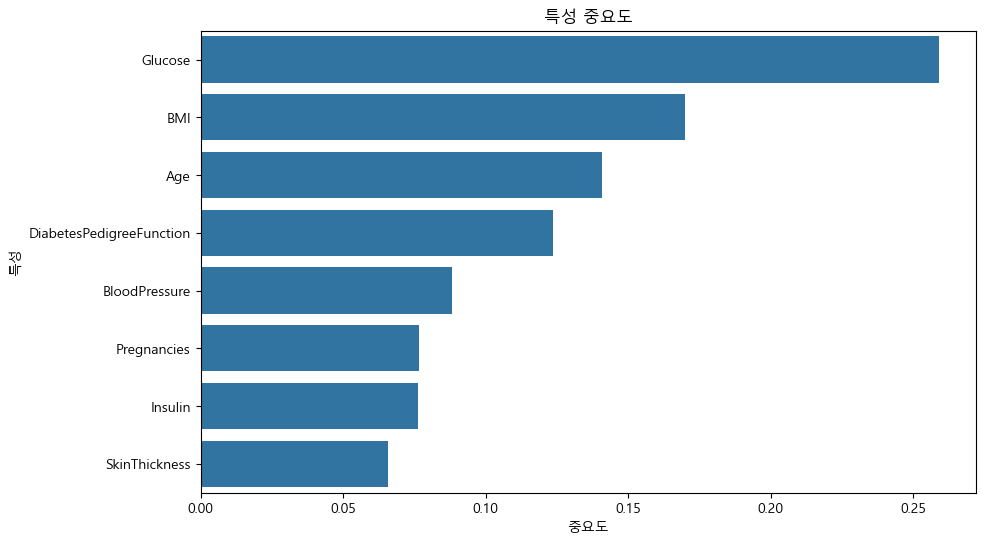

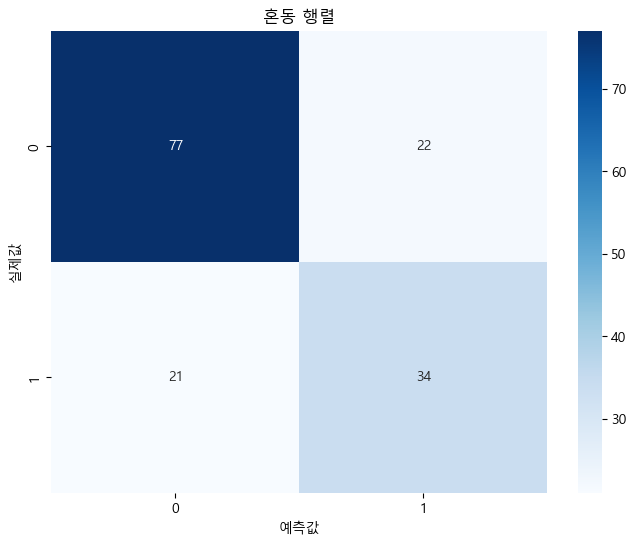

In [ ]:
#당뇨병 데이터셋을 통한 예제 (랜덤포레스트)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
diabetes = pd.read_csv('./dataset/diabetes.csv')
diabetes.head()

# 특성(X)과 타겟(y) 분리
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# " 데이터 전처리 "
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(x_scaled.head())

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 학습 (랜덤 포레스트) "Classfier"
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 에측
ypred = rf_model.predict(X_test)

# 교차검증 
cv_score = cross_val_score(rf_model, X_scaled, y, cv=5)

# 특성 중요도
# feature_importances_ (중요도 속성)
importance = pd.DataFrame({
    '특성' : X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending = False)
print(importance.head())

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
# 시각화 > sns . 바형태 > barplot
sns.barplot(x='중요도', y='특성', data=importance)
plt.title('특성 중요도')
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
                      # 실제 결과 # 결과 예측 (얼마나 다른지)                     
cm = confusion_matrix(y_test, ypred)
         #"데이터" #colorbar 유무  #정수형태 # 색깔
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()